<a href="https://colab.research.google.com/github/rasyiqahizzati/sql_airasia/blob/main/SQL_JOIN_SQLite_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL JOIN
Prepared by:  
**Dr Tan Yan Bin** \[ [LinkedIn](https://www.linkedin.com/in/yyanbin-tan/) | [Email](mailto:yanbintan@airasia.com) \]  
©2022 AirAsia Academy Sdn Bhd. All rights reserved.

## Initialization

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
dbconnection = sqlite3.connect('staff.sqlite')
c = dbconnection.cursor()

query = "SELECT name FROM sqlite_master WHERE type = 'table'"
print(c.execute(query).fetchall())

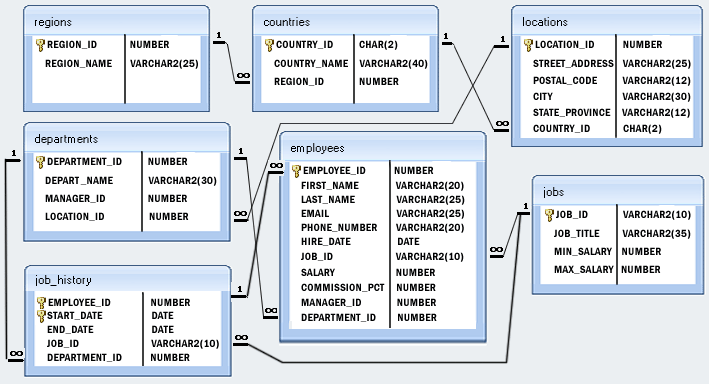

## JOIN Clause
A `JOIN` clause is used to join two or more tables in a database using primary keys and/or foreign keys.  
There are 4 kinds of joins, namely


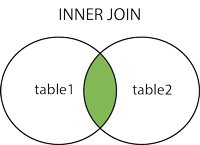 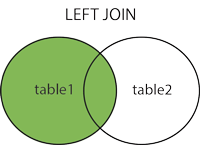 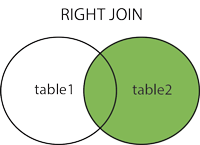 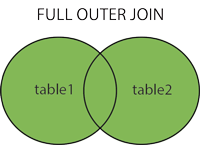

### 1: INNER JOIN
Returns only the mutual records from both tables.
```
SELECT column(s)
FROM table1
INNER JOIN table2
ON table1.column = table2.column
```

In [ ]:
query = """

SELECT employees.first_name, employees.last_name, departments.depart_name
FROM employees
INNER JOIN departments
ON employees.department_id = departments.department_id

"""

pd.read_sql_query(query, dbconnection)

To simplify the work, set alias to the table names:

In [ ]:
query = """

SELECT e.first_name, e.last_name, d.depart_name
FROM employees e
INNER JOIN departments d
ON e.department_id = d.department_id

"""

pd.read_sql_query(query, dbconnection)

Join more than 2 tables:

In [ ]:
query = """

SELECT e.first_name, e.last_name, d.depart_name, j.job_title
FROM employees e
INNER JOIN departments d
ON e.department_id = d.department_id
INNER JOIN jobs j
ON e.job_id = j.job_id

"""

pd.read_sql_query(query, dbconnection)

### 2: LEFT JOIN
Returns all records from the left (first) table, and also matching records from the right (second) table.
```
SELECT column(s)
FROM table1
LEFT JOIN table2
ON table1.column = table2.column
```

In [ ]:
query = """

SELECT d.depart_name, e.first_name, e.last_name
FROM departments d
LEFT JOIN employees e
ON d.department_id = e.department_id

"""

pd.read_sql_query(query, dbconnection)

### 3: RIGHT JOIN
Returns all records from the right (second) table, and also matching records from the left (first) table.
```
SELECT column(s)
FROM table1
RIGHT JOIN table2
ON table1.column = table2.column
```

In [ ]:
query = """

SELECT d.depart_name, e.first_name, e.last_name
FROM departments d
RIGHT JOIN employees e
ON d.department_id = e.department_id

"""

pd.read_sql_query(query, dbconnection)

Seems like SQLite does not support RIGHT JOIN. How do we get the results that we want?

In [ ]:
query = """

SELECT d.depart_name, e.first_name, e.last_name
FROM employees e
LEFT JOIN departments d
ON d.department_id = e.department_id

"""

pd.read_sql_query(query, dbconnection)

### 4: FULL OUTER JOIN
Returns all matching records from both tables.
```
SELECT column(s)
FROM table1
FULL OUTER JOIN table2
ON table1.column = table2.column
```

In [ ]:
query = """

SELECT e.first_name, e.last_name, d.depart_name
FROM employees e
FULL OUTER JOIN departments d
ON e.department_id = d.department_id

"""

pd.read_sql_query(query, dbconnection)

Seems like SQLite also does not support FULL OUTER JOIN. How do we get the results that we want?

### 5: UNION Operator
The `UNION` operator is used to combine the results of two or more `SELECT` statements.  
Note that both the `SELECT` statements shall have the **same columns** in the **same order**.

In [ ]:
query = """

SELECT d.depart_name, e.first_name, e.last_name
FROM departments d
LEFT JOIN employees e
ON d.department_id = e.department_id
UNION
SELECT d.depart_name, e.first_name, e.last_name
FROM employees e
LEFT JOIN departments d
ON d.department_id = e.department_id

"""

pd.read_sql_query(query, dbconnection)

### 6: Self JOIN
Join a table with itself. (WHY???)

In [ ]:
query = """

SELECT employee_id, first_name || ' ' || last_name  AS 'employee_name', manager_id
FROM employees

"""

pd.read_sql_query(query, dbconnection)

In [ ]:
query = """

SELECT e.employee_id, e.first_name || ' ' || e.last_name  AS 'employee_name', e.manager_id, m.first_name || ' ' || m.last_name  AS 'manager_name'
FROM employees e
JOIN employees m
ON e.manager_id = m.employee_id

"""

pd.read_sql_query(query, dbconnection)

## Exercise

1. Write a query to find the addresses (street_address, city, state_province, country_name) of all the departments. Make it as a new column calledd "Full Address".

,Department Name,Full Address
0,Administration,"1700, 2004 Charade Rd, Seattle, Washington, Un..."
1,Marketing,"1800, 147 Spadina Ave, Toronto, Ontario, Canada"
2,Purchasing,"1700, 2004 Charade Rd, Seattle, Washington, Un..."
3,Human Resources,"2400, 8204 Arthur St, London, , United Kingdom"
4,Shipping,"1500, 2011 Interiors Blvd, South San Francisco..."
5,IT,"1400, 2014 Jabberwocky Rd, Southlake, Texas, U..."
6,Public Relations,"2700, Schwanthalerstr. 7031, Munich, Bavaria, ..."
7,Sales,"2500, Magdalen Centre, The Oxford Science Park..."
8,Executive,"1700, 2004 Charade Rd, Seattle, Washington, Un..."
9,Finance,"1700, 2004 Charade Rd, Seattle, Washington, Un..."


2. Write a query to find the names (first_name, last name), department ID and the department name of employees whose salary is less than 5000.

,first_name,last_name,department_id,depart_name
0,David,Austin,60,IT
1,Valli,Pataballa,60,IT
2,Diana,Lorentz,60,IT
3,Alexander,Khoo,30,Purchasing
4,Shelli,Baida,30,Purchasing
5,Sigal,Tobias,30,Purchasing
6,Guy,Himuro,30,Purchasing
7,Karen,Colmenares,30,Purchasing
8,Julia,Nayer,50,Shipping
9,Irene,Mikkilineni,50,Shipping


3. Write a query to get the department name and number of employees in each department. Sort your result set according to number of employees.

,Department Name,Num of Employees
0,Administration,1
1,Human Resources,1
2,Public Relations,1
3,Marketing,2
4,Accounting,2
5,Executive,3
6,IT,5
7,Purchasing,6
8,Finance,6
9,Sales,34


4. (Q22 from the previous exercise) Write a query to find the names (first_name, last_name) of the employees who have a manager who works for a department based in the United States.

,first_name,last_name
0,Steven,King
1,Neena,Kochhar
2,Lex,De Haan
3,Alexander,Hunold
4,Bruce,Ernst
...,...,...
63,Donald,OConnell
64,Douglas,Grant
65,Jennifer,Whalen
66,Shelley,Higgins


5. (Q23 from the previous exercise) Write a query to find the names (first_name, last_name), the salary of the employees whose salary is equal to the minimum salary for their job grade.

,first_name,last_name,salary
0,Karen,Colmenares,2500
1,Martha,Sullivan,2500
2,Randall,Perkins,2500
